In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Duplicate key in file PosixPath('/root/.cache/pypoetry/virtualenvs/jupyter-analysis-fN-W4g9T-py3.9/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc'), line 263 ('font.family:  sans-serif')


Text(0, 0.5, 'petal_width')

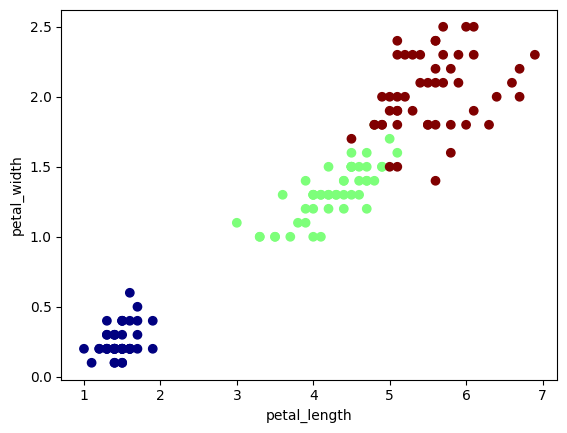

In [3]:
# irisデータ
from sklearn.datasets import load_iris

# データ読み込み
iris = load_iris()
iris.keys()

# データフレームに格納
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target # アヤメの種類（正解ラベル）
df_iris.head()

# 2変数の散布図（正解ラベルで色分け）
plt.scatter(df_iris['petal length (cm)'], df_iris['petal width (cm)'], c=df_iris.target, cmap=mpl.cm.jet)
plt.xlabel('petal_length')
plt.ylabel('petal_width')

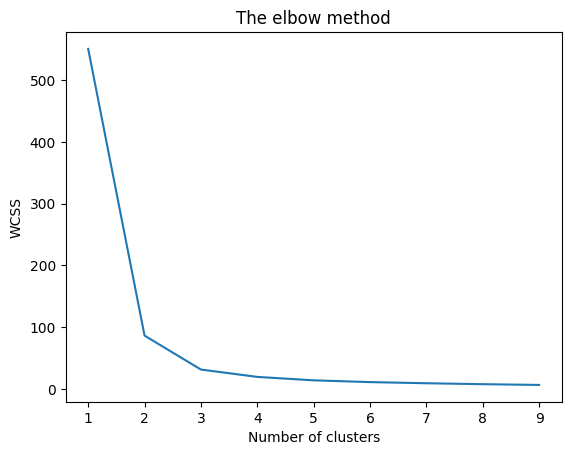

In [4]:
# Elbow Method
wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 30, random_state = 0)
    kmeans.fit(df_iris.iloc[:, 2:4])
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 10), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

/root/.cache/pypoetry/virtualenvs/jupyter-analysis-fN-W4g9T-py3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'Predict')

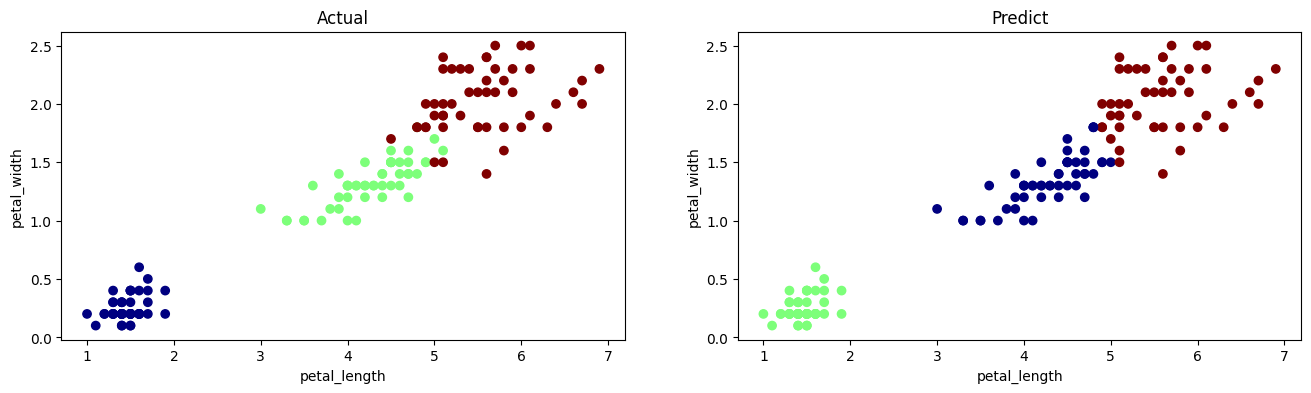

In [5]:
# モデリング
clf = KMeans(n_clusters=3, random_state=1)
clf.fit(df_iris.iloc[:, 2:4])

# 学習データのクラスタ番号
clf.labels_

# 未知データに対してクラスタ番号を付与
# 今回は学習データに対して予測しているので、`clf.labels_` と同じ結果
y_pred = clf.predict(df_iris.iloc[:, 2:4])
y_pred

# 実際の種類とクラスタリングの結果を比較
fig, (ax1, ax2) = plt.subplots(figsize=(16, 4), ncols=2)

# 実際の種類の分布
ax1.scatter(df_iris['petal length (cm)'], df_iris['petal width (cm)'], c=df_iris.target, cmap=mpl.cm.jet)
ax1.set_xlabel('petal_length')
ax1.set_ylabel('petal_width')
ax1.set_title('Actual')
# クラスター分析で分類されたクラスタの分布
ax2.scatter(df_iris['petal length (cm)'], df_iris['petal width (cm)'], c=y_pred, cmap=mpl.cm.jet)
ax2.set_xlabel('petal_length')
ax2.set_ylabel('petal_width')
ax2.set_title('Predict')

In [45]:
df = pd.read_csv("fararaf.csv",encoding="cp932")

In [46]:
df = df[df['緯度'] > 0]

In [48]:
df = df[df['納品区分'] == '67']

In [49]:
len(df)

1754

/tmp/ipykernel_34/1138948327.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['経度'], df['緯度'], cmap=mpl.cm.jet)


Text(0, 0.5, 'petal_width')

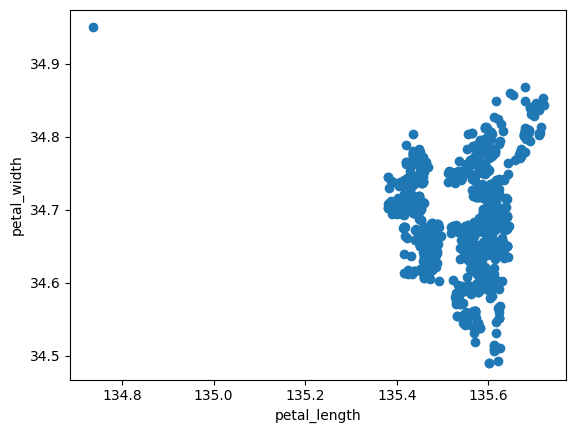

In [50]:
# 2変数の散布図（正解ラベルで色分け）
plt.scatter(df['経度'], df['緯度'], cmap=mpl.cm.jet)
plt.xlabel('petal_length')
plt.ylabel('petal_width')

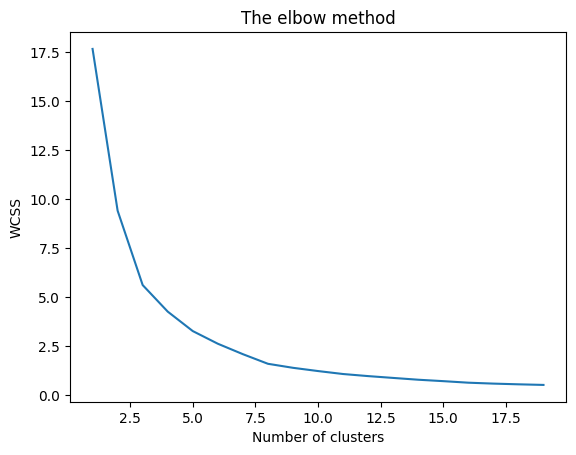

In [51]:
# Elbow Method
wcss = []

for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 30, random_state = 0)
    kmeans.fit(df[["経度", "緯度"]])
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 20), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [52]:
pred=KMeans(n_clusters=10).fit_predict(df[["経度","緯度"]])

/root/.cache/pypoetry/virtualenvs/jupyter-analysis-fN-W4g9T-py3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [53]:
print(pred)

[6 1 5 ... 4 0 8]


In [54]:
df['pred'] = pred

Text(0, 0.5, 'petal_width')

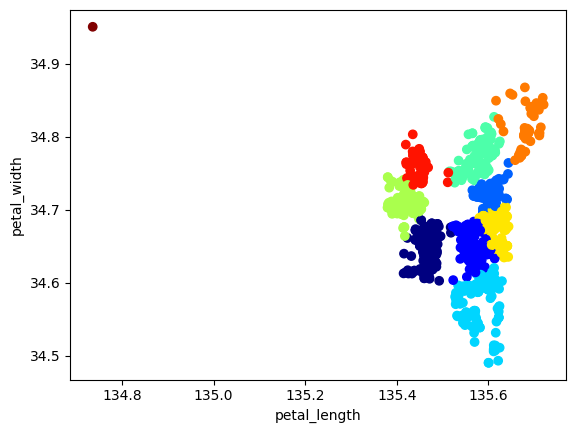

In [55]:
# 2変数の散布図（正解ラベルで色分け）
plt.scatter(df['経度'], df['緯度'], c=df['pred'], cmap=mpl.cm.jet)
plt.xlabel('petal_length')
plt.ylabel('petal_width')

In [56]:
df['pred'].value_counts ()

pred
6    343
1    263
0    220
3    194
4    187
2    179
5    164
8    134
7     69
9      1
Name: count, dtype: int64

In [57]:
import folium

In [58]:
def get_color(pred):
    color = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']
    return color[pred]

In [59]:
folium_map = folium.Map()

for index, row in df.iterrows():
    folium.Marker(
        location=[row['緯度'], row['経度']],
        popup= f"{row['名称']} / {row['住所1']}",
        icon=folium.Icon(color=get_color(row['pred']))
    ).add_to(folium_map)


In [60]:
folium_map